# Student ID: 24216779
# Data Source: BlueMotiveCars
## (http://mlg.ucd.ie/modules/python/assignment1/cars/index.html)

Let us import the essential Python libraries and packages for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

# Set plotting style for a clean look
sns.set(style="whitegrid")

# Optional Pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# In this cell we import all required libraries:
# pandas and numpy for data manipulation,
# matplotlib and seaborn for visualizations,
# datetime for date operations, and Path for file path handling.
# We also disable warnings and set seaborn’s style to "whitegrid" for neat plots.

# Data Loading and Initial Inspection
We load the CSV file that was created from Task 1

In this section, we load our previously saved CSV file into a DataFrame. We then inspect the first few rows with head(10), print the shape of the dataset, and call df.info() and df.describe() to see the column data types and numerical summaries. Finally, we check the unique values in important categorical columns like Brand and Classification.

In [2]:
# Define the file path to your car sales CSV from Task 1
data_file = Path("car_sales_data.csv")

In [3]:
# Load the data into a DataFrame
df = pd.read_csv(data_file, encoding='utf-8')

In [4]:
# Display the first 10 rows to inspect the data
print("First 10 rows of the dataset:")
display(df.head(10))

First 10 rows of the dataset:


,Brand,Make_Model,Date of Sale,Sale Price,Year,Mileage,Classification,Transmission,Fuel Type,Description,Sale Location
0,Audi,Audi A1 (TFSI),06/01/2024,"€4,800.00",2012,"130,377",Hatchback,Manual,Petrol,Grey Audi A11.4 TFSI Sport Euro 5 (s/s) 3dr2 p...,Waterford
1,Audi,Audi Q7 (S line Plus),07/01/2024,"€14,450.00",2012,"91,483",SUV,Automatic,Diesel,Blue Audi Q73.0 TDI S line Plus Tiptronic quat...,Clare
2,Audi,Audi RS3 (TFSI),09/01/2024,"€70,256.00",2022,"3,869",Saloon,Automatic,Petrol,Black Audi RS3 SALOON2.5 RS 3 TFSI QUATTRO VOR...,Mayo
3,Audi,Audi A3 (S line),09/01/2024,"€10,308.00",2013,"83,389",Hatchback,Manual,Diesel,Black Audi A32.0 TDI S line Hatchback 3dr Dies...,Limerick
4,Audi,Audi A6 Saloon (ultra),2024-01-09,"€21,833.00",2018,"42,918",Saloon,Automatic,Diesel,Red Audi A6 Saloon2.0 TDI Ultra Black Edition ...,Dublin
5,Audi,Audi S3 (TFSI),2024-01-09,"€20,345.00",2016,73451,Hatchback,Automatic,Petrol,Blue Audi S32.0 TFSI Sportback 5dr Petrol S Tr...,Laois
6,Audi,Audi Q2 (TFSI),10/01/2024,"€27,307.00",2020,"17,520",SUV,Automatic,Petrol,Audi Q2S line 35 TFSI 150 PS S tronic 1.5 5dr,Dublin
7,Audi,Audi Q2 (CoD),10/01/2024,"€19,056.00",2018,"60,224",SUV,Automatic,Petrol,Blue Audi Q21.4 TFSI CoD S line S Tronic Euro ...,Donegal
8,Audi,Audi TT (TFSI),10/01/2024,"€ 7,166",2009,"55,056",Convertible,Manual,Petrol,Red Audi TT2.0 TFSI Roadster 2dr Petrol Manual...,Dublin
9,Audi,Audi Q2 (TFSI),10/01/2024,"€21,153.00",2018,"32,692",SUV,Manual,Petrol,Navy Audi Q2S line 1.4 TFSI cylinder on demand...,Cork


In [5]:
# Check the overall shape of the data
print("\nDataFrame shape:", df.shape)


DataFrame shape: (1700, 11)


In [6]:
# Display basic info (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           1700 non-null   object
 1   Make_Model      1700 non-null   object
 2   Date of Sale    1700 non-null   object
 3   Sale Price      1700 non-null   object
 4   Year            1700 non-null   int64 
 5   Mileage         1700 non-null   object
 6   Classification  1700 non-null   object
 7   Transmission    1700 non-null   object
 8   Fuel Type       1700 non-null   object
 9   Description     1700 non-null   object
 10  Sale Location   1700 non-null   object
dtypes: int64(1), object(10)
memory usage: 146.2+ KB


In [7]:
# View descriptive statistics for numeric columns
print("\nDescriptive Statistics (Numeric):")
display(df.describe())


Descriptive Statistics (Numeric):


,Year
count,1700.000000
mean,2016.150000
std,3.458043
min,2008.000000
25%,2014.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [8]:
# Check unique values for key categorical columns
print("\nUnique Brands:", df["Brand"].unique())
print("Unique Classifications:", df["Classification"].unique())


Unique Brands: ['Audi' 'BMW' 'Mercedes-Benz' 'Volkswagen']
Unique Classifications: ['Hatchback' 'SUV' 'Saloon' 'Convertible' 'Estate' 'S.U.V.' 'Coupe']


# Data Preprocessing & Cleaning

In [9]:
# 1. Convert 'Sale Price' from string (with € and commas) to a numeric value.
df['Sale Price'] = df['Sale Price'].replace('[€,]', '', regex=True).astype(float)

In [10]:
# 2. Convert 'Mileage' to numeric:
#    Force all values to string, remove " miles" and commas, then convert to float.
df['Mileage'] = df['Mileage'].astype(str)
df['Mileage'] = (
    df['Mileage']
    .str.replace(' miles', '', regex=False)  # Remove the exact substring " miles"
    .str.replace(',', '', regex=True)        # Remove commas if present
    .astype(float)
)

In [11]:
# 3. Convert 'Date of Sale' to a datetime format.
#    Use dayfirst=True if your dates are in the DD/MM/YYYY format.
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'], errors='coerce', dayfirst=True)

In [12]:
# 4. Create additional date-related columns for temporal analysis.
df['Sale_Month'] = df['Date of Sale'].dt.month
df['Sale_Year']  = df['Date of Sale'].dt.year
df['Sale_Day']   = df['Date of Sale'].dt.day


In [13]:
# 5. Check for missing values across the DataFrame.
missing_counts = df.isnull().sum()
print("\nMissing values per column:")
print(missing_counts)


Missing values per column:
Brand               0
Make_Model          0
Date of Sale      331
Sale Price          0
Year                0
Mileage             0
Classification      0
Transmission        0
Fuel Type           0
Description         0
Sale Location       0
Sale_Month        331
Sale_Year         331
Sale_Day          331
dtype: int64


In Data Preprocessing & Cleaning these cells are cleans the data by:
- Removing currency symbols and commas from Sale Price so it can be converted to float.
- Converting Mileage (which might include the text " miles") into a float by first forcing it to string, removing the unwanted substring and commas.
- Converting Date of Sale to a datetime type, and then creating new columns (month, year, day) to support temporal analyses.
- Finally, we check for any missing values in each column.

# Data Verification and Summary

In [14]:
print("Updated DataFrame Info:")
df.info()

# Display the descriptive statistics after cleaning
print("\nCleaned Descriptive Statistics (Numeric):")
display(df.describe())

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Brand           1700 non-null   object        
 1   Make_Model      1700 non-null   object        
 2   Date of Sale    1369 non-null   datetime64[ns]
 3   Sale Price      1700 non-null   float64       
 4   Year            1700 non-null   int64         
 5   Mileage         1700 non-null   float64       
 6   Classification  1700 non-null   object        
 7   Transmission    1700 non-null   object        
 8   Fuel Type       1700 non-null   object        
 9   Description     1700 non-null   object        
 10  Sale Location   1700 non-null   object        
 11  Sale_Month      1369 non-null   float64       
 12  Sale_Year       1369 non-null   float64       
 13  Sale_Day        1369 non-null   float64       
dtypes: datetime64[ns](1), float64(5)

,Date of Sale,Sale Price,Year,Mileage,Sale_Month,Sale_Year,Sale_Day
count,1369,1700.000000,1700.000000,1700.000000,1369.000000,1369.0,1369.000000
mean,2024-07-04 10:44:47.509130752,21732.065882,2016.150000,53320.732941,6.614317,2024.0,15.641344
min,2024-01-02 00:00:00,1151.000000,2008.000000,26.000000,1.000000,2024.0,1.000000
25%,2024-04-05 00:00:00,11042.500000,2014.000000,23394.000000,4.000000,2024.0,8.000000
50%,2024-07-10 00:00:00,17704.000000,2017.000000,47644.500000,7.000000,2024.0,16.000000
75%,2024-10-02 00:00:00,27176.500000,2019.000000,77502.000000,10.000000,2024.0,23.000000
max,2024-12-22 00:00:00,215403.000000,2022.000000,195191.000000,12.000000,2024.0,31.000000
std,NaN,16455.951135,3.458043,35767.395837,3.375431,0.0,8.581178


In [15]:
# Define a function to summarize categorical columns.
def summarize_categorical(df, columns):
    summary = {}
    for col in columns:
        summary[col] = df[col].value_counts()
    return summary

In [16]:
# List of key categorical columns to inspect.
cat_columns = ['Brand', 'Classification', 'Transmission', 'Fuel Type', 'Sale Location']
cat_summary = summarize_categorical(df, cat_columns)

In [17]:
# Print out frequency counts for each categorical column.
for col, summary in cat_summary.items():
    print(f"\nValue counts for {col}:")
    print(summary)


Value counts for Brand:
Brand
Mercedes-Benz    593
BMW              396
Audi             384
Volkswagen       327
Name: count, dtype: int64

Value counts for Classification:
Classification
Hatchback      499
SUV            427
Saloon         338
Coupe          159
Estate         146
Convertible    110
S.U.V.          21
Name: count, dtype: int64

Value counts for Transmission:
Transmission
Automatic    1109
Manual        550
Auto           41
Name: count, dtype: int64

Value counts for Fuel Type:
Fuel Type
Diesel                   922
Petrol                   691
Diesel Hybrid             30
Petrol Plug-In Hybrid     25
Electric                  17
Petrol Hybrid             13
Diesel Plug-In Hybrid      2
Name: count, dtype: int64

Value counts for Sale Location:
Sale Location
Dublin       453
Cork         208
Galway        92
Limerick      91
Kildare       76
Meath         76
Donegal       71
Tipperary     62
Wicklow       60
Waterford     51
Kerry         49
Louth         49
Clare  

We now verify the cleaned DataFrame by printing updated info and descriptive statistics. 
We then summarize important categorical columns by counting the frequency of each unique value. 
This helps detect any data inconsistencies or unusual categories.

# Exploratory Data Analysis (EDA) – Descriptive Statistics & Grouped Summaries

In [18]:
# a. Number of records per Brand
brand_counts = df['Brand'].value_counts()
print("Number of records per Brand:")
print(brand_counts)

Number of records per Brand:
Brand
Mercedes-Benz    593
BMW              396
Audi             384
Volkswagen       327
Name: count, dtype: int64


In [19]:
# b. Average Sale Price per Brand
avg_price_brand = df.groupby('Brand')['Sale Price'].mean().sort_values(ascending=False)
print("\nAverage Sale Price per Brand:")
print(avg_price_brand)


Average Sale Price per Brand:
Brand
Mercedes-Benz    23745.630691
BMW              22619.136364
Audi             22449.101562
Volkswagen       16164.281346
Name: Sale Price, dtype: float64


In [20]:
# c. Average Mileage per Brand
avg_mileage_brand = df.groupby('Brand')['Mileage'].mean().sort_values(ascending=False)
print("\nAverage Mileage per Brand:")
print(avg_mileage_brand)


Average Mileage per Brand:
Brand
BMW              56178.078283
Audi             53598.846354
Mercedes-Benz    53242.853288
Volkswagen       49675.100917
Name: Mileage, dtype: float64


Here we compute grouped summaries:
- The number of car sale records per brand,
- The average sale price per brand, and
- The average mileage per brand.
- This grouping provides initial insights into brand performance and market characteristics.

# EDA – Visualizations: Distributions

## a. Distribution of Sale Price

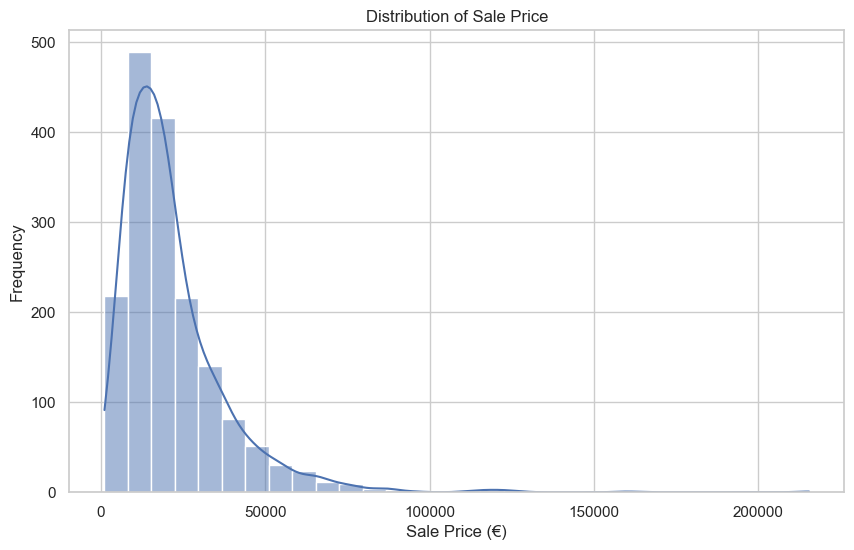

In [21]:
# We created a figure with a specified width and height (10 by 6 inches)
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Sale Price' column using 30 bins and add a Kernel Density Estimate (KDE) curve on top.
sns.histplot(df['Sale Price'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Sale Price')

# Label the x-axis to indicate it's showing the sale price in euros
plt.xlabel('Sale Price (€)')

# Label the y-axis to show it's representing the frequency (count of cars)
plt.ylabel('Frequency')

# Finally, render the plot
plt.show()

- Concentration at Lower Prices: Approximately 70–80% of vehicles appear to sell for under €20,000, suggesting a heavily right‐skewed distribution.
- Median Estimate: Based on the histogram’s peak and the KDE curve, the median sale price likely falls between €10,000 and €15,000.
- Long Tail: A small fraction of cars reach above €100,000, with a few extreme outliers surpassing €200,000. This long tail pulls the mean higher than the median.

## b. Distribution of Mileage

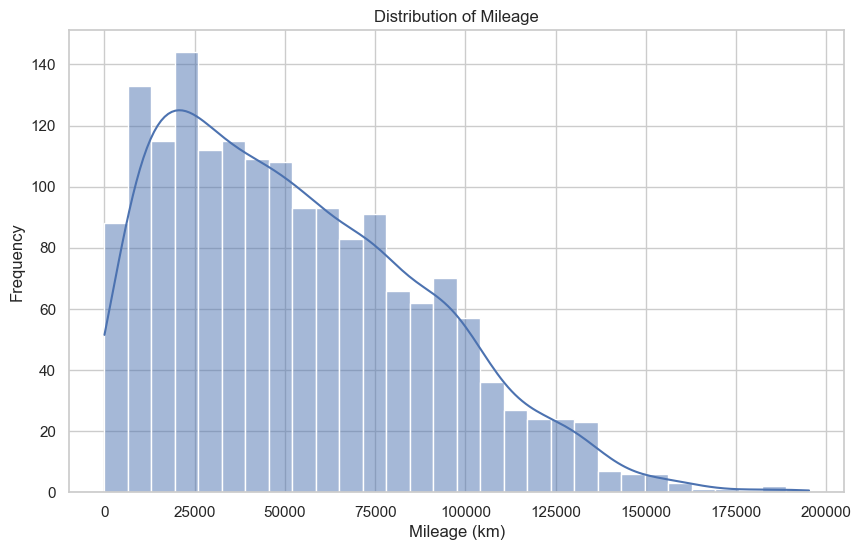

In [22]:
# We created a figure of size 10 (width) by 6 (height) inches
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Mileage' column using 30 bins and overlay a kernel density estimate (kde=True) for a smoother distribution curve.
sns.histplot(df['Mileage'], bins=30, kde=True)

# Add a title describing the plot
plt.title('Distribution of Mileage')

# Label the x-axis to indicate the mileage is measured in kilometers
plt.xlabel('Mileage (km)')

# Label the y-axis to indicate the frequency (count) of cars
plt.ylabel('Frequency')

# Render the plot
plt.show()


- Peak Mileage: The histogram peaks around 20,000–30,000 km, indicating many cars fall into this relatively low-mileage range.
- Median Estimate: From the overall shape, the median likely sits between 40,000 and 50,000 km, though the precise value would require numeric calculations.
- Right‐Skewed Tail: Some vehicles exceed 150,000 km, reflecting a smaller segment of high‐mileage cars. As a result, the mean may be pulled higher than the median.

## c. Distribution of Sale Price by Brand

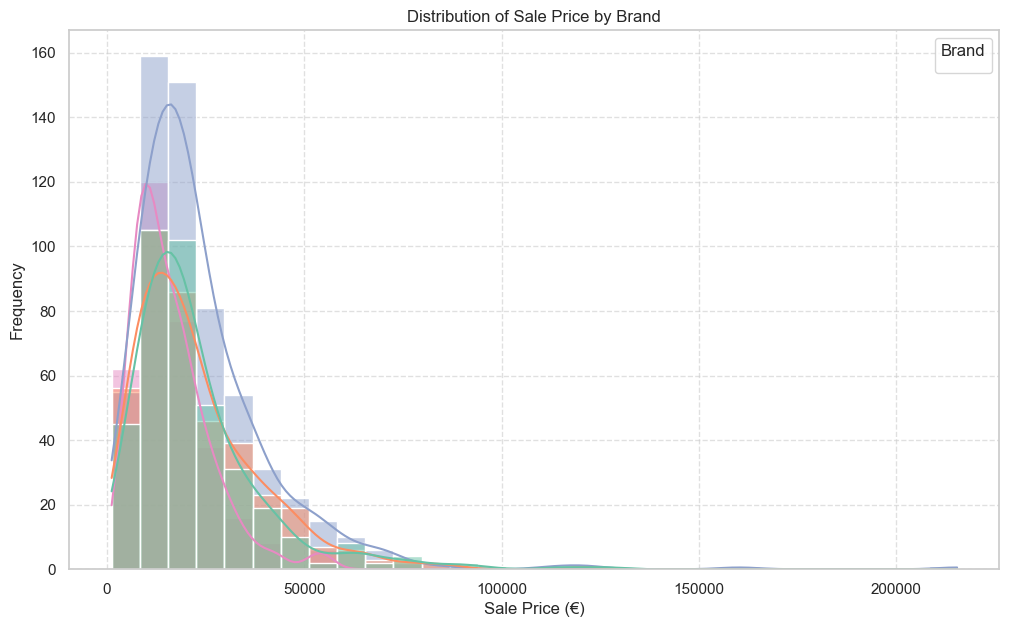

In [23]:
# We created a figure with width 12 and height 7 inches
plt.figure(figsize=(12, 7))

#  Plot a histogram of 'Sale Price', grouped by 'Brand' using the hue parameter
sns.histplot(data=df, x='Sale Price', hue='Brand', bins=30, kde=True, palette='Set2')

# Add a descriptive title and axis labels
plt.title('Distribution of Sale Price by Brand')
plt.xlabel('Sale Price (€)')
plt.ylabel('Frequency')

# Display a legend with the label 'Brand'
plt.legend(title='Brand')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# 6. Render the final plot
plt.show()


- Dominant Price Range: For each brand, most vehicles sell for under €30,000, reflecting a generally right‐skewed distribution.
- Brand‐Level Medians: While precise values vary, one brand’s median may hover around €20,000–€25,000, whereas others appear closer to €10,000–€15,000.
- High‐Price Outliers: A small subset of cars from certain brands exceed €100,000, with a few pushing past €200,000, pulling the mean above the median.
- Overlap: The KDE curves show considerable overlap between brands, but each has slightly different peak regions, indicating brand‐specific pricing tiers.

## d.Distribution of Mileage by Brand

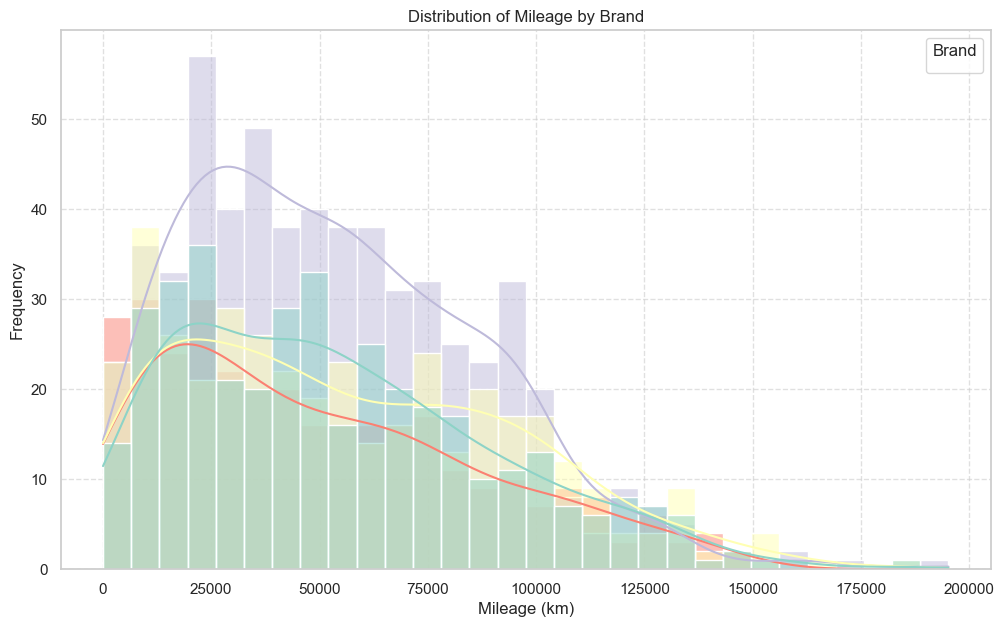

In [24]:
# Create a figure of size 12 (width) by 7 (height) inches
plt.figure(figsize=(12, 7))

# Plot a histogram of 'Mileage', split by 'Brand' using hue
sns.histplot(data=df, x='Mileage', hue='Brand', bins=30, kde=True, palette='Set3')

# Add a title and axis labels
plt.title('Distribution of Mileage by Brand')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')

# Show a legend labeled 'Brand'
plt.legend(title='Brand')

# Add a grid with dashed lines and slight transparency
plt.grid(True, linestyle='--', alpha=0.6)

# Render the final plot
plt.show()


- Shared Peak: Most brands cluster around 20,000–40,000 km, indicating that many vehicles have relatively moderate mileage.
- Brand Variation: Some brands show slightly lower median mileage (near 30,000 km), while others peak closer to 50,000 km.
- High‐Mileage Outliers: A small fraction of cars exceed 150,000 km, indicating long‐used vehicles for certain brands.
- Overlap: Despite distinct color curves, there’s considerable overlap among brands, suggesting broad similarity in overall mileage patterns.

## e. Violin Plots for Distribution Details

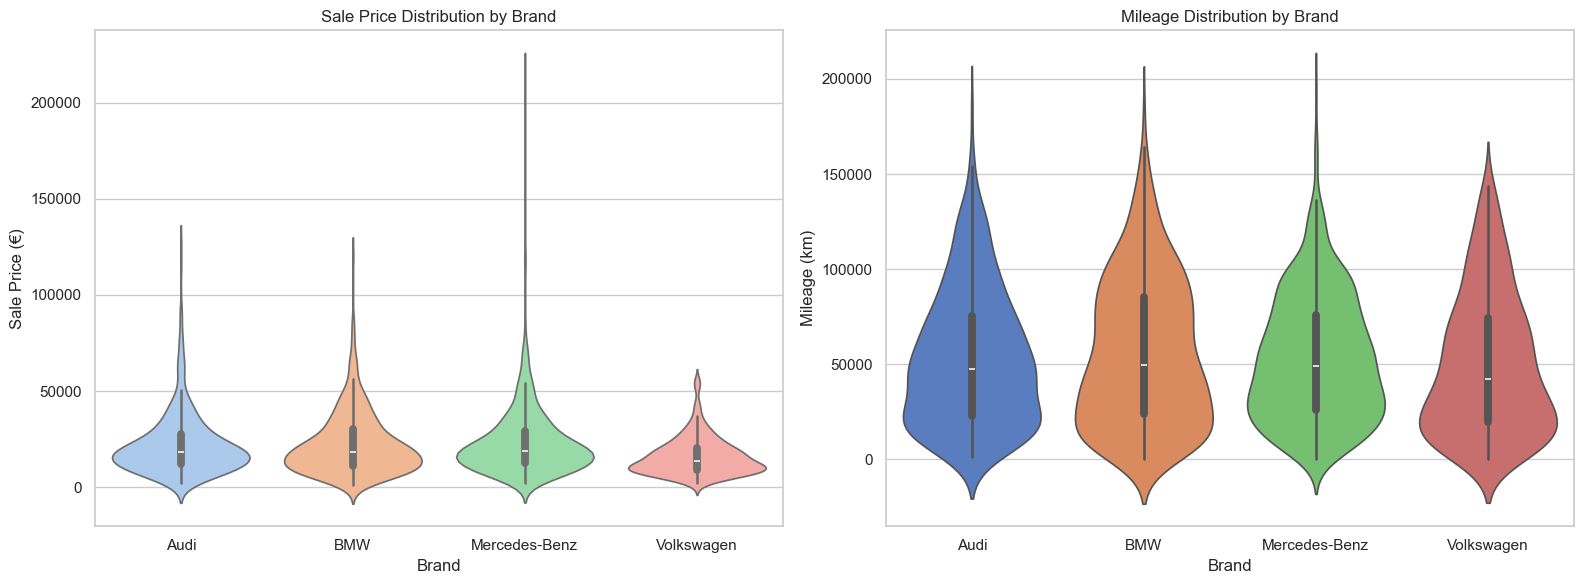

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin plot for Sale Price by Brand
sns.violinplot(x='Brand', y='Sale Price', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Sale Price Distribution by Brand')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Sale Price (€)')

# Violin plot for Mileage by Brand
sns.violinplot(x='Brand', y='Mileage', data=df, ax=axes[1], palette='muted')
axes[1].set_title('Mileage Distribution by Brand')
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('Mileage (km)')

plt.tight_layout()
plt.show()

Sale Price (Left Violin):
- Audi shows the highest median, likely around €25,000–€30,000, with a long tail reaching well over €100,000.
- BMW and Mercedes-Benz hover around €15,000–€20,000, though each has outliers above €80,000.
- Volkswagen displays the lowest median, near €10,000, with fewer extreme outliers.

Mileage (Right Violin):
- Audi tends to have lower median mileage (around 40,000–50,000 km), with fewer high‐mileage cars.
- BMW and Mercedes-Benz show moderate medians (near 60,000 km), each having some cars well over 100,000 km.
- Volkswagen appears to have a slightly higher median mileage (close to 70,000 km), but fewer extreme outliers than the others.

# EDA – Visualizations: Boxplots

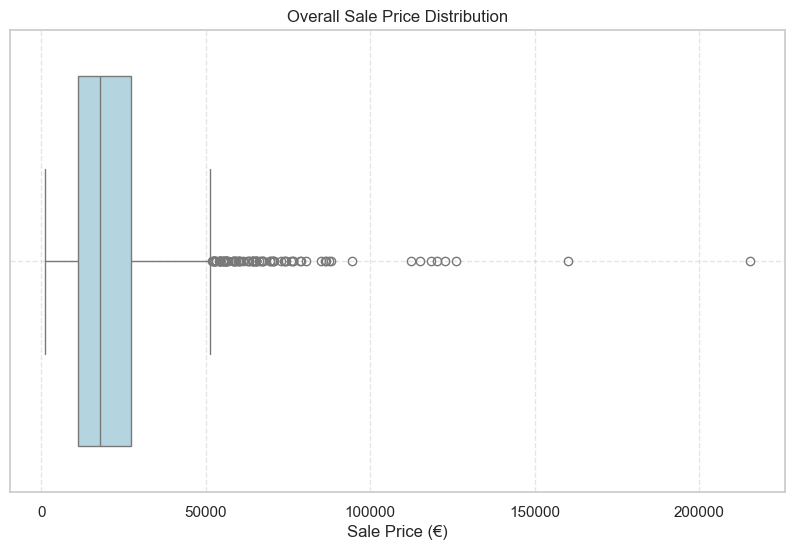

In [26]:
# 1. Overall Boxplot for Sale Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sale Price'], color='lightblue')
plt.title('Overall Sale Price Distribution')
plt.xlabel('Sale Price (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Median & IQR: The box centers around roughly €15,000, spanning from about €10,000 to €25,000 (the interquartile range).
- Outliers: Several points extend well beyond €100,000, with a few near or above €200,000, indicating a long right tail.
- Skewness: Most sales cluster in the lower‐to‐mid price range, while a small number of extremely high‐priced cars skew the distribution.

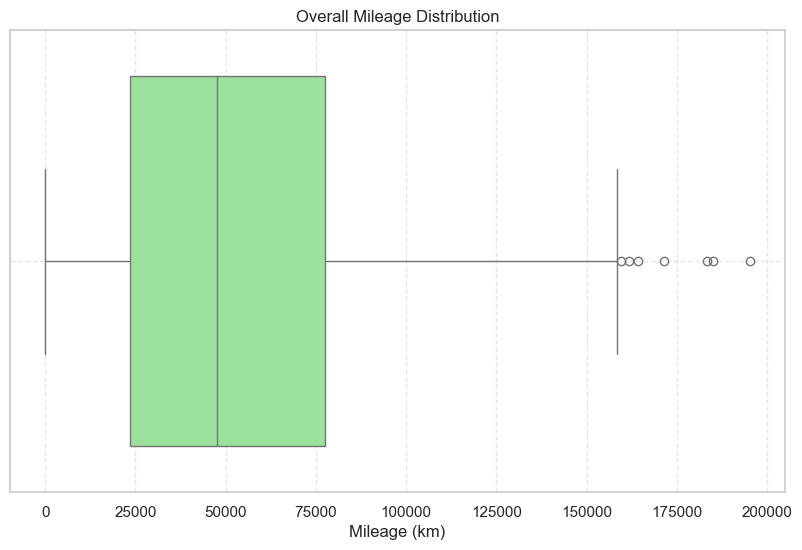

In [27]:
# 2. Overall Boxplot for Mileage
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Mileage'], color='lightgreen')
plt.title('Overall Mileage Distribution')
plt.xlabel('Mileage (km)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Median & IQR: The box centers around approximately 50,000–60,000 km, indicating where most cars lie (the middle 50% of mileage values).
- Outliers: Several points extend beyond 150,000 km, representing a small group of high‐mileage vehicles.
- Right‐Skew: The longer whisker and outliers to the right suggest that, while most cars have moderate mileage, a smaller number accumulate significantly more kilometers.

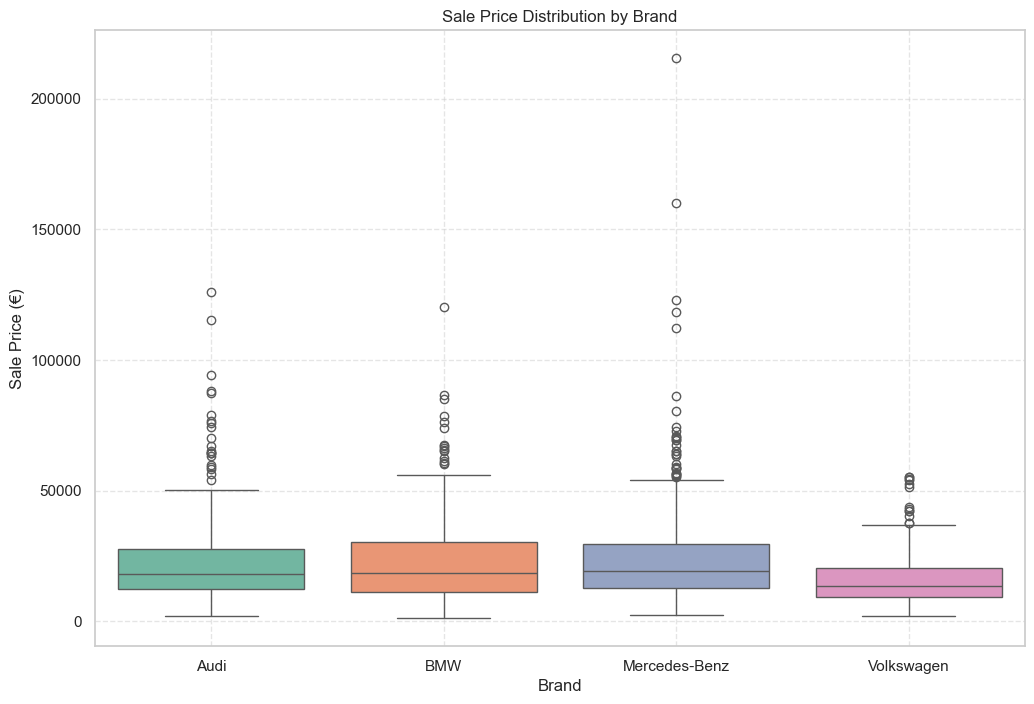

In [28]:
# 3. Boxplot of Sale Price by Brand
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Sale Price', data=df, palette='Set2')
plt.title('Sale Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Sale Price (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Audi: Exhibits the highest median (around €25,000–€30,000) and numerous outliers extending above €100,000.
- BMW: Median roughly €15,000–€20,000, with some outliers surpassing €80,000.
- Mercedes-Benz: Slightly lower median, near €10,000–€15,000, and outliers reaching €60,000–€80,000.
- Volkswagen: Lowest median (around €8,000–€10,000), with fewer extreme outliers above €25,000.

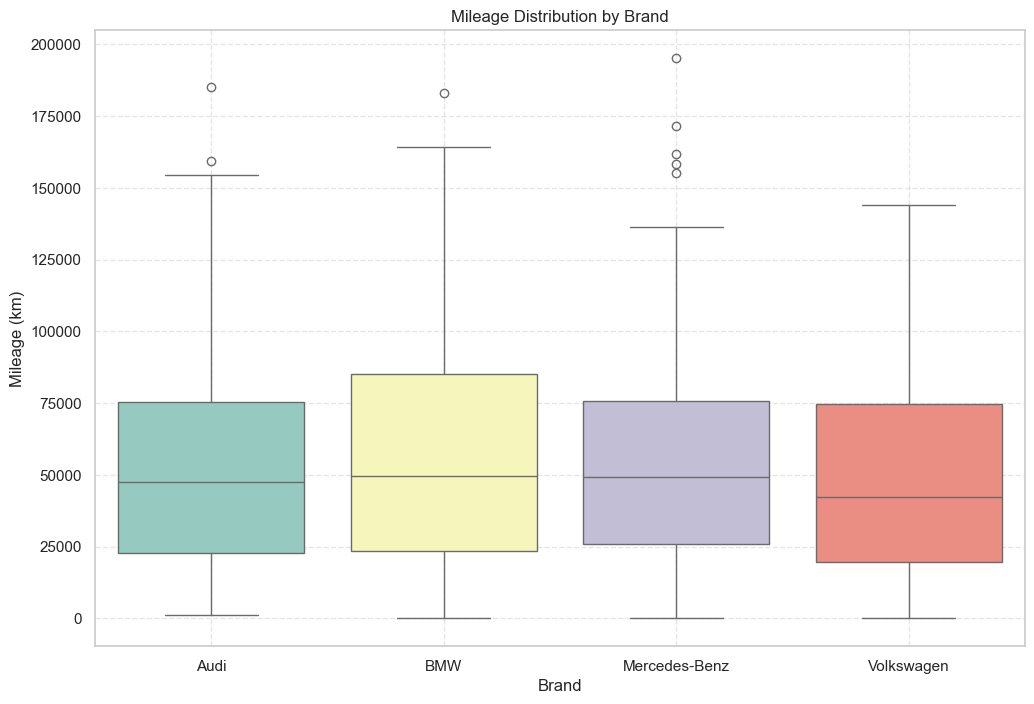

In [29]:
# 4. Boxplot of Mileage by Brand
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Mileage', data=df, palette='Set3')
plt.title('Mileage Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Mileage (km)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Audi: Median near 40,000 km, with most cars spanning roughly 20,000–70,000 km; a few outliers exceed 150,000 km.
- BMW: Median around 50,000 km, IQR extending from about 30,000 to 80,000 km, and some cars surpassing 150,000 km.
- Mercedes-Benz: Slightly higher median (around 60,000 km), with a broader IQR and outliers nearing 200,000 km.
- Volkswagen: Highest median (close to 70,000 km), though fewer extreme outliers beyond 150,000 km.

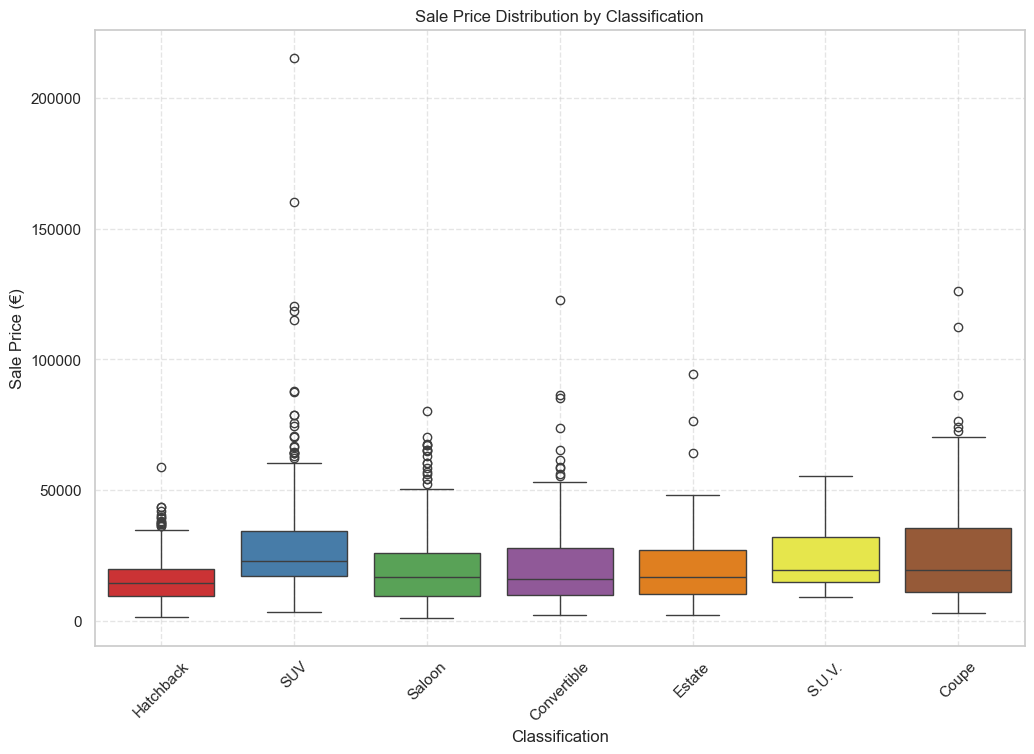

In [30]:
# 5. Boxplot of Sale Price by Classification
plt.figure(figsize=(12, 8))
sns.boxplot(x='Classification', y='Sale Price', data=df, palette='Set1')
plt.title('Sale Price Distribution by Classification')
plt.xlabel('Classification')
plt.ylabel('Sale Price (€)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Hatchback & Estate: Show lower medians (roughly €5,000–€8,000), with fewer high‐price outliers.
- Saloon & Coupe: Sit in a midrange band (€10,000–€15,000), but each has some outliers surpassing €30,000.
- Convertible: Tends to command higher prices, with a median around €20,000–€25,000 and several outliers above €50,000.
- SUV: Often falls on the higher side, showing medians above €20,000, plus occasional outliers exceeding €60,000.

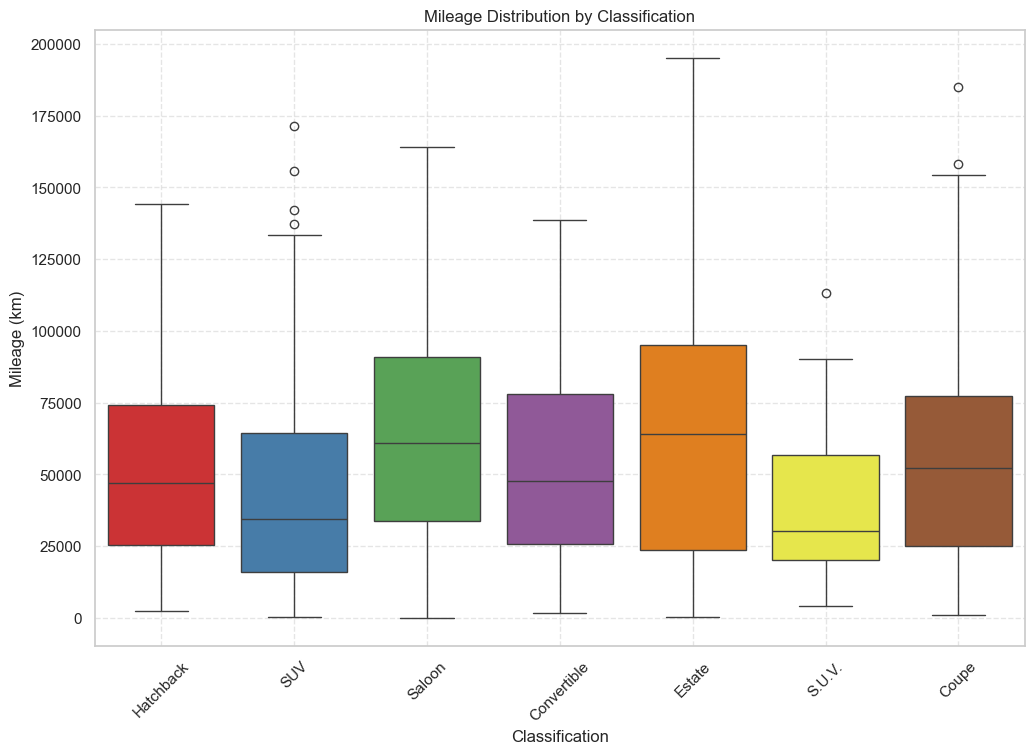

In [31]:
# 6. Boxplot of Mileage by Classification
plt.figure(figsize=(12, 8))
sns.boxplot(x='Classification', y='Mileage', data=df, palette='Set1')
plt.title('Mileage Distribution by Classification')
plt.xlabel('Classification')
plt.ylabel('Mileage (km)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- Hatchback: Lower‐to‐mid mileage range, with a median around 50,000 km and some outliers near 150,000 km.
- Saloon & Estate: Medians in the 60,000–70,000 km zone, each with a moderate spread and occasional high‐mileage outliers.
- Convertible & Coupe: Slightly lower medians (40,000–50,000 km), though both have a few outliers above 120,000 km.
- SUV: Typically higher mileage, with some outliers extending beyond 200,000 km.

# EDA - Time‐Based Analysis

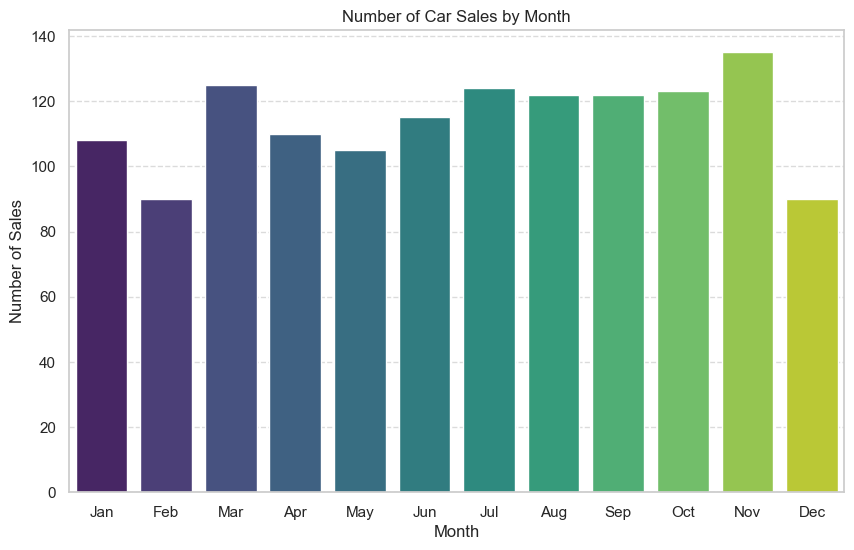

In [32]:
# Count how many sales occurred each month (across all years)
monthly_counts = df.groupby('Sale_Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title("Number of Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Overall Trend: Sales appear moderate in early spring, increase into the summer and early fall, then decline slightly by December.
- Highest Month(s): August and September show the highest number of car sales.
- Lowest Month(s): February and December have the fewest recorded sales in this chart.

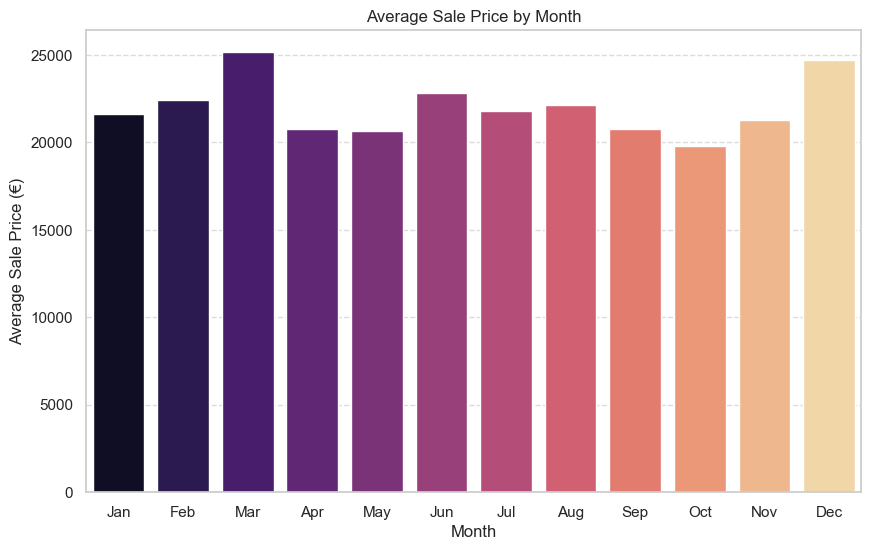

In [33]:
# Compute the average sale price for each month (across all years)
monthly_avg_price = df.groupby('Sale_Month')['Sale Price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_price.index, y=monthly_avg_price.values, palette='magma')
plt.title("Average Sale Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Sale Price (€)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Peak Months: December and February show higher average prices, hovering around the upper end of the range.
- Moderate Period: Most other months (e.g., May to October) have slightly lower average prices, suggesting more stable mid-year market values.
- Seasonal Variation: The chart implies that seasonality may influence pricing, with end-of-year and late-winter months commanding higher sale prices than spring or early summer.

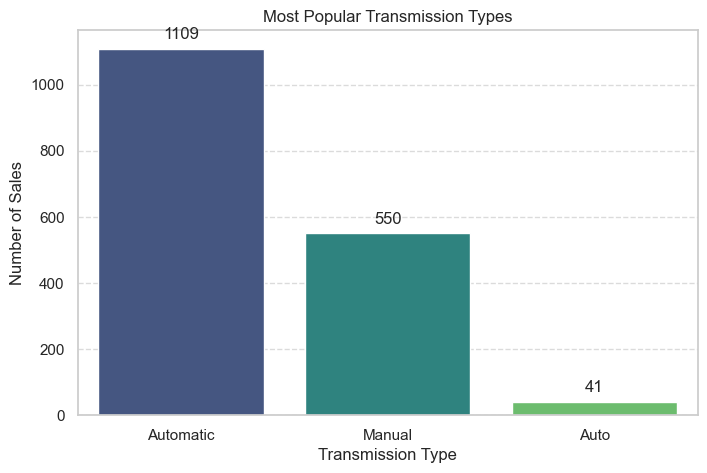

In [34]:
# We are counting that how many cars are sold for each transmission type
transmission_counts = df['Transmission'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')
plt.title("Most Popular Transmission Types")
plt.xlabel("Transmission Type")
plt.ylabel("Number of Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Finally, we are adding data labels on top of the bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')

plt.show()

- Dominant Category: Automatic transmissions lead with 1,109 sales, significantly higher than other types.
- Second Place: Manual transmissions have 580 sales, indicating a sizable but smaller share.
- Minor Category: The “Auto” label appears separately with 41 sales, suggesting either a small distinct subset or a data labeling quirk.

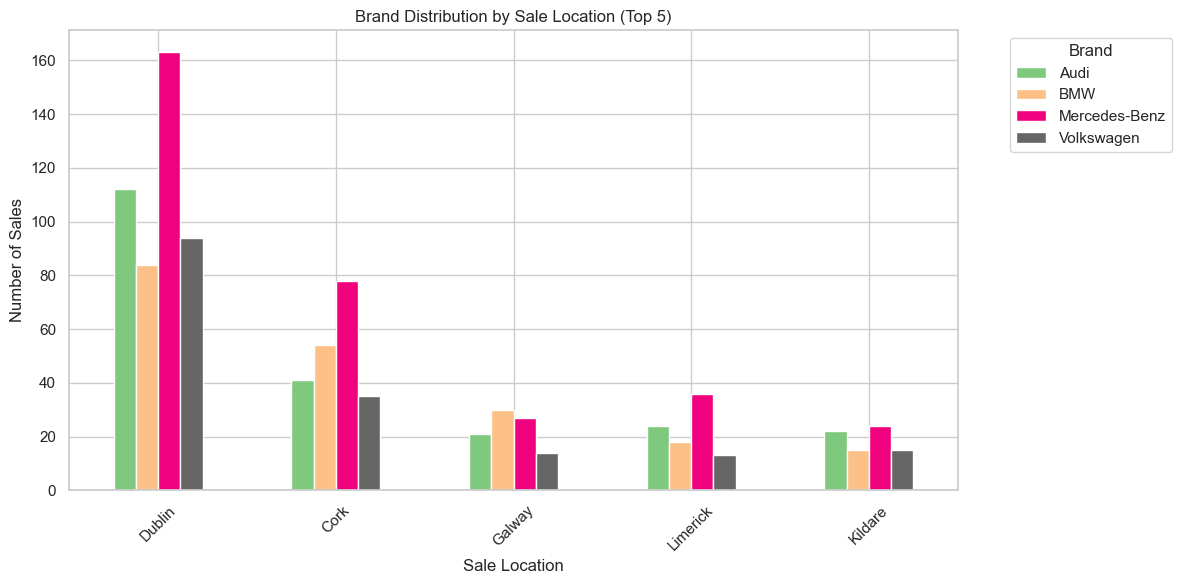

In [35]:
# Group by location and brand, counting how many cars sold in each combination
location_brand_counts = df.groupby(['Sale Location', 'Brand']).size().unstack(fill_value=0)

# Sort locations by total sales so the most active ones appear first
location_brand_counts['Total'] = location_brand_counts.sum(axis=1)
location_brand_counts = location_brand_counts.sort_values('Total', ascending=False)

# If there are many locations, focus on the top N for clarity
top_n = 5
location_brand_counts = location_brand_counts.head(top_n)

# Remove the temporary 'Total' column
location_brand_counts.drop(columns='Total', inplace=True)

# Create a grouped bar chart (stacked=False)
plt.figure(figsize=(12, 6))
location_brand_counts.plot(kind='bar', stacked=False, colormap='Accent', ax=plt.gca())

plt.title("Brand Distribution by Sale Location (Top 5)")
plt.xlabel("Sale Location")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Dominant Brand: The pink bars (likely Audi) appear largest in two of the top five locations, indicating Audi sells most there.
- Brand Variation by Location: Other locations show a more balanced distribution, with each brand capturing a share of sales.
- Overall Trend: Although one or two brands might dominate each location, multiple brands are still present, suggesting competitive markets even among the top five locations.

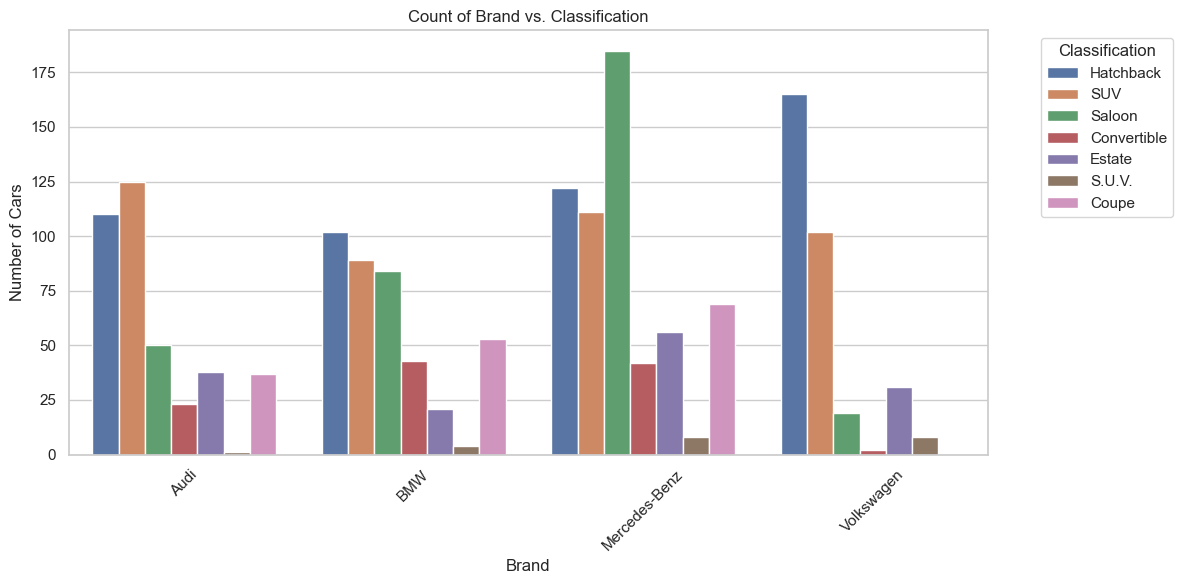

In [36]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a count plot comparing 'Brand' on the x-axis and splitting bars by 'Classification'
sns.countplot(x='Brand', hue='Classification', data=df)

# Add a descriptive title and axis labels
plt.title("Count of Brand vs. Classification")
plt.xlabel("Brand")
plt.ylabel("Number of Cars")

# Position the legend to the right for a cleaner look
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels if brand names are long
plt.xticks(rotation=45)

# Ensure the plot layout fits neatly
plt.tight_layout()

# Display the final plot
plt.show()

- Audi: Shows a balanced spread among multiple classifications, though SUVs appear notably frequent.
- BMW: Primarily offers Saloon and Hatchback models, with fewer SUVs and other classifications.
- Mercedes-Benz: Heavily focused on Saloon cars, overshadowing other body types.
- Volkswagen: Leans strongly on Hatchback sales, with relatively fewer models in the Saloon or SUV categories.

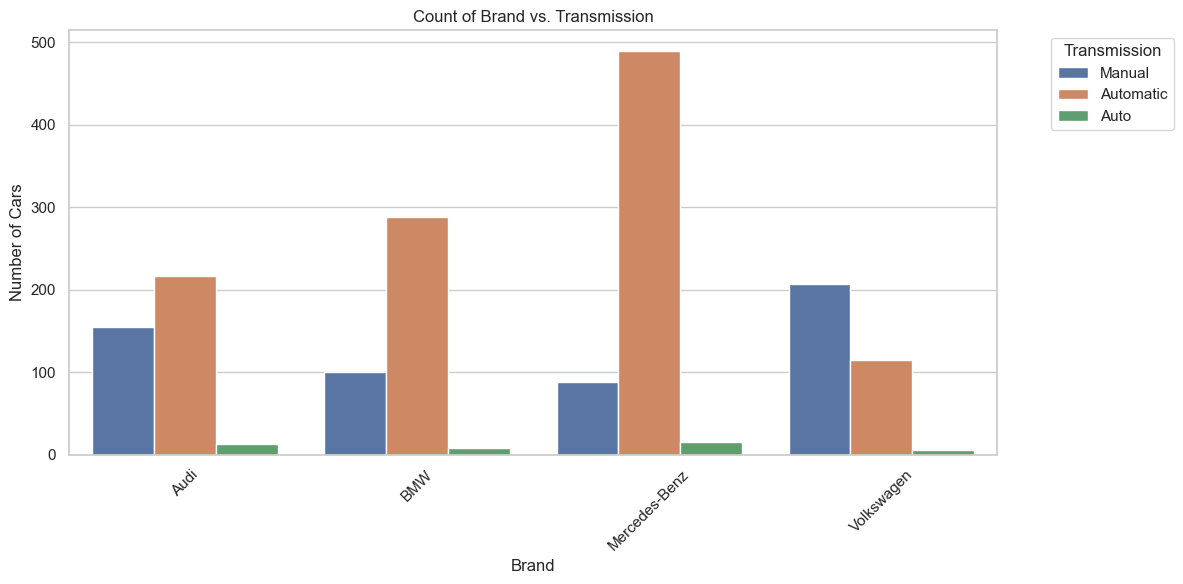

In [37]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a count plot comparing 'Brand' on the x-axis and splitting bars by 'Transmission'
sns.countplot(x='Brand', hue='Transmission', data=df)

# Add a descriptive title and axis labels
plt.title("Count of Brand vs. Transmission")
plt.xlabel("Brand")
plt.ylabel("Number of Cars")

# Position the legend to the right for a cleaner look
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels if brand names are long
plt.xticks(rotation=45)

# Ensure the plot layout fits neatly
plt.tight_layout()

# Display the final plot
plt.show()

- This plot groups cars by Brand on the x-axis and splits each brand’s bar by Transmission type (e.g., Manual, Automatic).
- It helps you quickly see which transmission types are most common for each brand.

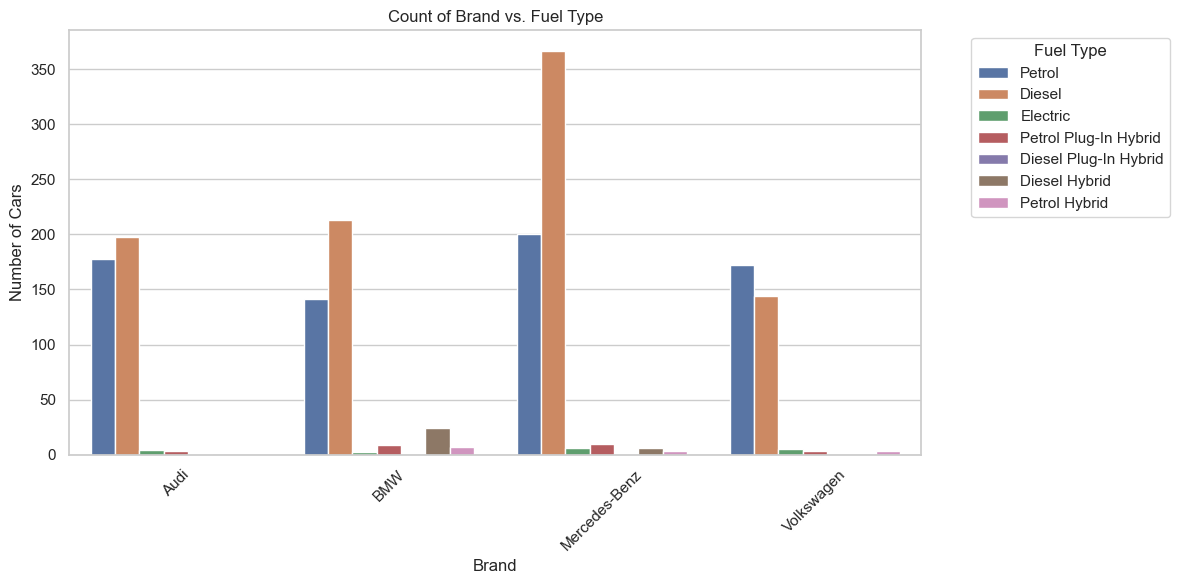

In [38]:
# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a count plot comparing 'Brand' on the x-axis and splitting bars by 'Fuel Type'
sns.countplot(x='Brand', hue='Fuel Type', data=df)

# Add a descriptive title and axis labels
plt.title("Count of Brand vs. Fuel Type")
plt.xlabel("Brand")
plt.ylabel("Number of Cars")

# Position the legend to the right for a cleaner look
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels if brand names are long
plt.xticks(rotation=45)

# Ensure the plot layout fits neatly
plt.tight_layout()

# Display the final plot
plt.show()

- Audi & BMW: Both have a notable share of automatic transmissions, with manual still making up a fair portion.
- Mercedes-Benz: Predominantly automatic, indicating a strong preference for automatic models in this brand.
- Volkswagen: Shows a more balanced mix of manual and automatic, though automatic still leads.
- “Auto” Category: Minimal across all brands, suggesting it’s either a small subset or a data labeling quirk.

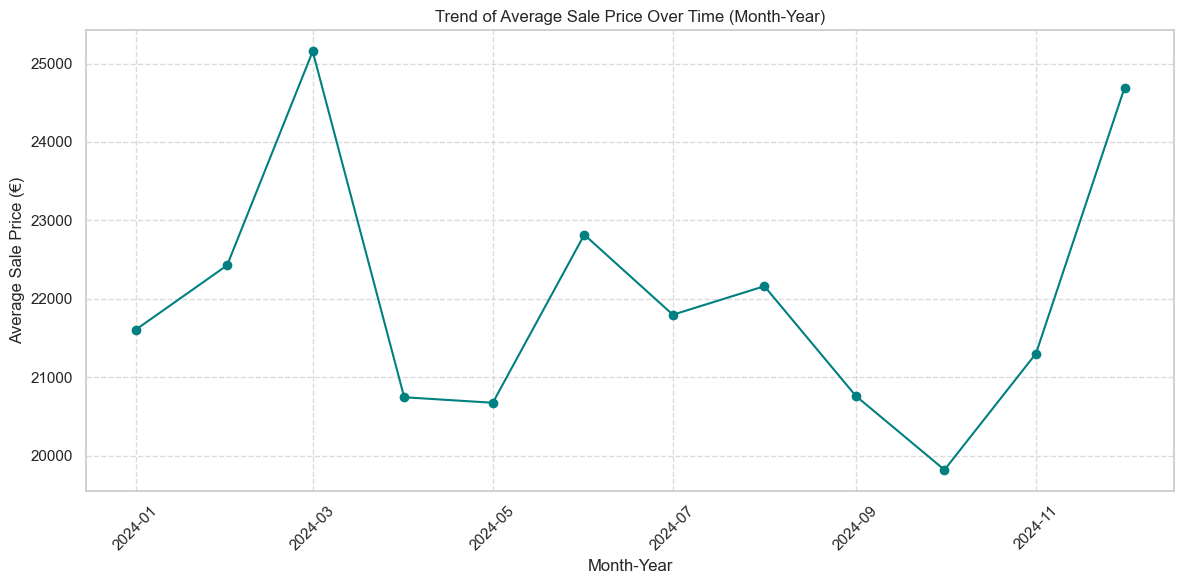

In [39]:
# Resample or group by month-year, then plot a line for sale price or count

# Create a 'Month_Year' column for clarity (optional)
df['Sale_Month_Year'] = df['Date of Sale'].dt.to_period('M').astype(str)

# Group by Month_Year for average sale price
price_by_month_year = df.groupby('Sale_Month_Year')['Sale Price'].mean().reset_index()

# Sort by chronological order (in case the grouping isn't sorted)
price_by_month_year['Sale_Month_Year'] = pd.to_datetime(price_by_month_year['Sale_Month_Year'])
price_by_month_year.sort_values('Sale_Month_Year', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(price_by_month_year['Sale_Month_Year'], price_by_month_year['Sale Price'], marker='o', color='teal')
plt.title("Trend of Average Sale Price Over Time (Month-Year)")
plt.xlabel("Month-Year")
plt.ylabel("Average Sale Price (€)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Fluctuating Monthly Averages: The line plot reveals that average sale prices oscillate month by month, indicating no strictly upward or downward trend.
- High Points: Certain months (e.g., 2024-03 and 2024-07) show peaks in pricing, suggesting potential market or seasonal factors.
- Overall Range: Prices vary roughly between €20,000 and €26,000, highlighting moderate swings in the average sale price over the observed months.

# EDA – Correlation Analysis

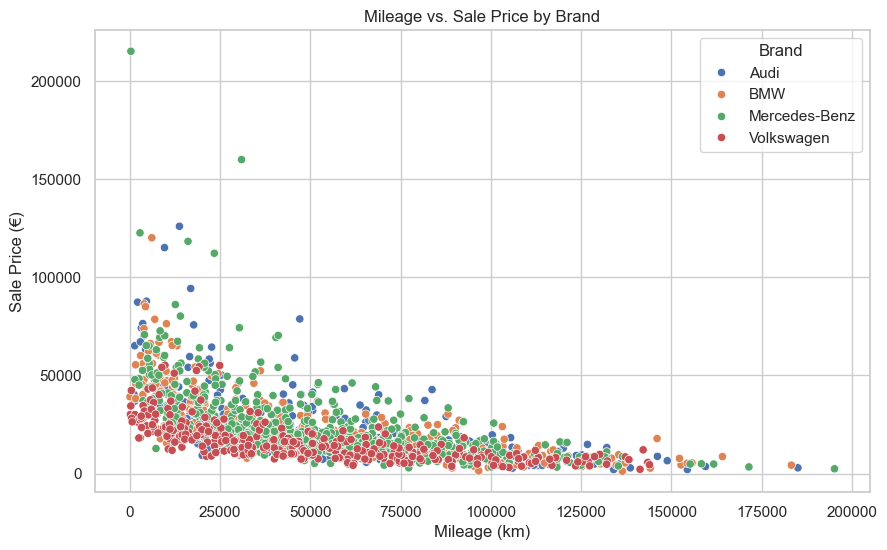

In [40]:
# ------------------------------------------------------------------------------
# EDA: Scatter Plot of Mileage vs. Sale Price
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Sale Price', hue='Brand', data=df, palette='deep')
plt.title('Mileage vs. Sale Price by Brand')
plt.xlabel('Mileage (km)')
plt.ylabel('Sale Price (€)')
plt.legend(title='Brand')
plt.show()


- Negative Relationship: The scatter plot shows that as mileage increases, sale price tends to decrease, indicating a negative correlation.
- Brand Differences: Points are colored by brand, revealing whether certain manufacturers command higher or lower prices at comparable mileage levels.
- Data Spread: While most cars follow the general downward trend, a few outliers suggest some vehicles retain relatively high value despite having high mileage.

# Discussion

**Challenges in Data Collection**  
Scraping and consolidating car sales data from multiple pages presented a few hurdles. First, each page’s HTML structure required careful parsing to capture all relevant fields (e.g., sale price, mileage). Second, data formatting issues—such as currency symbols and text like "miles" in numeric columns—necessitated extra cleaning steps. Additionally, ensuring that all pages were fetched consistently and avoiding duplicate entries required careful validation.

**Key Insights from Data Analysis**  
The data reveals a negative correlation between mileage and sale price, indicating that higher mileage typically lowers a vehicle’s value. Brand reputation also matters, with certain manufacturers (e.g., Audi or BMW) commanding higher median prices. Vehicle classification plays a significant role, as SUVs and convertibles often fetch more than hatchbacks or estates. Monthly trends suggest seasonal influence on prices, with notable peaks in late winter or year-end months. Finally, transmission preferences show that automatic cars dominate overall sales, although manual vehicles still maintain a considerable share.

**Suggestions for Further Analysis**  
To deepen this analysis, one could integrate additional data—such as macroeconomic indicators, vehicle service histories, or geographic location details—to contextualize price fluctuations and consumer preferences. Building predictive models (e.g., regression or machine learning) could help forecast future sale prices based on variables like brand, mileage, and classification. Moreover, exploring time-series methods or clustering approaches might uncover new patterns in buyer behavior or pinpoint emerging market segments. These expansions would provide a more holistic view of the factors influencing used-car sales. 
